In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#@Author Keiser, Haider

In [76]:
df = pd.read_csv("files\\fish_data.csv")
df.columns = ['species', 'length', 'weight', 'weight/length']

In [77]:
df.groupby(['species'])['weight'].mean()

species
Anabas testudineus        3.271239
Coilia dussumieri         2.747711
Otolithoides biauritus    3.198355
Otolithoides pama         3.849563
Pethia conchonius         4.585453
Polynemus paradiseus      3.989782
Puntius lateristriga      2.632799
Setipinna taty            3.101750
Sillaginopsis panijus     6.143143
Name: weight, dtype: float64

In [78]:
df.isnull().sum()
df.isna().sum()

species          0
length           0
weight           0
weight/length    0
dtype: int64

In [79]:
df.duplicated().sum()

np.int64(109)

In [80]:
fish_ladder_avg = df.groupby(['species'])['weight'].max().sort_values()

top_10 = fish_ladder_avg.tail(10)

least_10 = fish_ladder_avg.head(10)

bottom_top = pd.concat([top_10, least_10])


C:\Users\haide\AppData\Local\Temp\ipykernel_26764\4015302565.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=least_10.index, palette='RdYlBu_r')


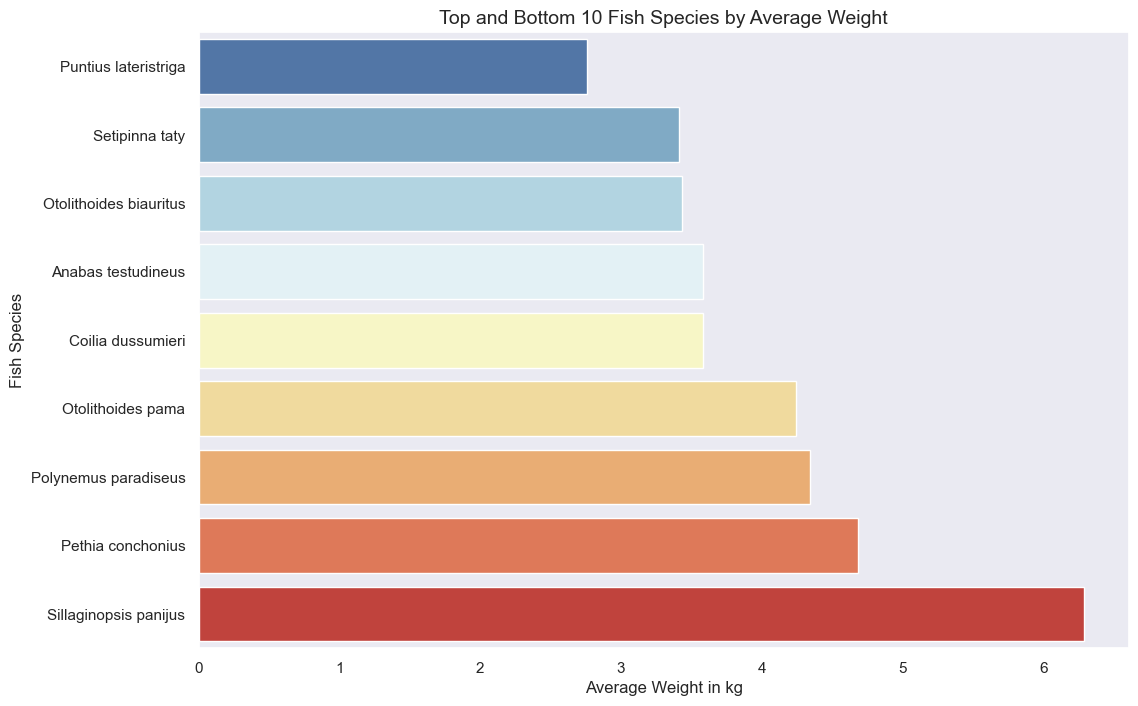

In [81]:

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10.values, y=least_10.index, palette='RdYlBu_r')

plt.title('Top and Bottom 10 Fish Species by Average Weight', fontsize=14)
plt.xlabel('Average Weight in kg', fontsize=12)
plt.ylabel('Fish Species', fontsize=12)
plt.show()


In [82]:
array = np.array(df['weight'])
#array = np.array([df['weight'], df['length']])
array

array([3.45, 3.27, 3.46, ..., 6.25, 6.11, 6.14])

In [83]:
np.mean(array)

np.float64(3.739875)

In [84]:
np.sum(array)

np.float64(15258.69)

In [85]:
np.min(array)

np.float64(2.05)

In [86]:
np.max(array)

np.float64(6.29)

In [87]:
np.argmin(array) #Index of the minimum value


np.int64(828)

In [88]:
np.argmax(array)


np.int64(4016)

In [89]:
np.sort(array)[:3]

array([2.05, 2.09, 2.15])

In [90]:
np.sort(array)[-3:]


array([6.27, 6.27, 6.29])

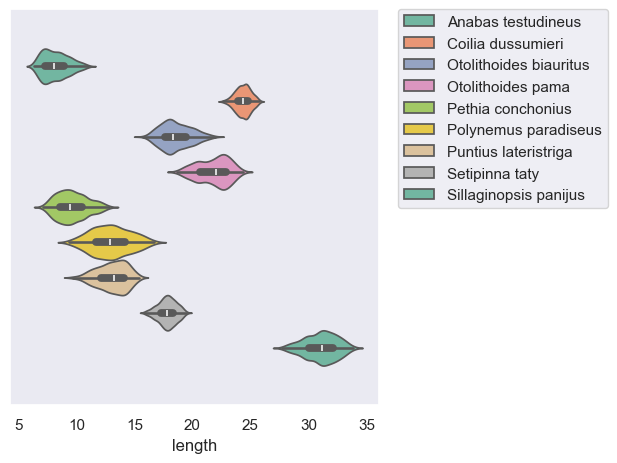

In [91]:
sns.violinplot( x='length', data=df, palette='Set2', legend=True,hue='species', gridsize=300)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Show the plot
plt.tight_layout()
plt.show()

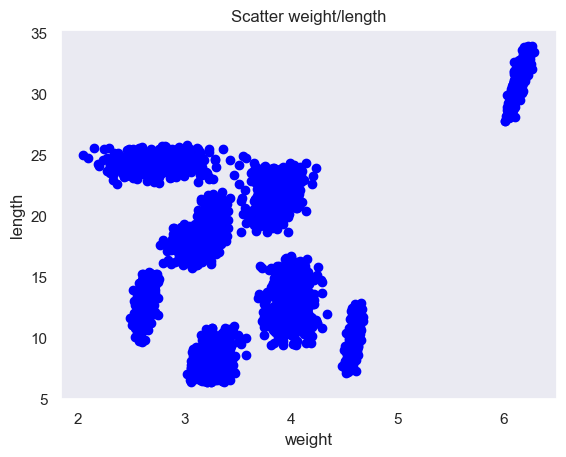

In [92]:
plt.scatter(x=df['weight'], y=df['length'], color="blue")
plt.xlabel('weight')
plt.ylabel('length')
plt.title('Scatter weight/length')
plt.show()

In [93]:
X = df[['length']].values
y = df['weight'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
# Evaluation
print('Accuracy: ', r2) # how accurate the test is, compared to the prediction

Accuracy:  0.16278470090854813


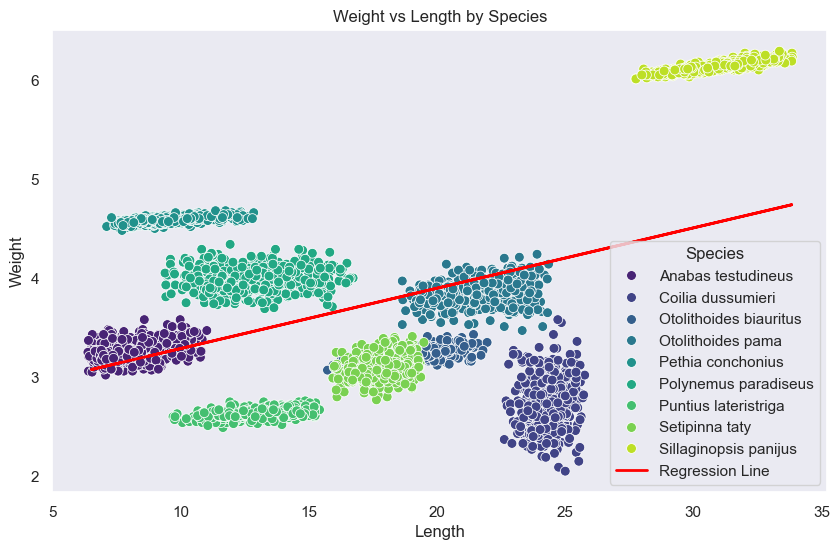

In [94]:
sns.set(style="dark")
plt.figure(figsize=(10, 6))

# Scatter plot with Seaborn and viridis color palette
sns.scatterplot(data=df, x='length', y='weight', hue='species', palette='viridis', s=50)

# Regression line with specified color, linewidth, and label
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression Line")

# Titles and labels
plt.title("Weight vs Length by Species")
plt.xlabel("Length")
plt.ylabel("Weight")

# Show legend with title
plt.legend(title='Species')
plt.show()


Length and weight by species

[Text(0.5909090909090909, 0.875, 'weight <= 4.41\ngini = 0.889\nsamples = 4080\nvalue = [476, 415, 468, 435, 475, 458, 418, 480, 455]'),
 Text(0.36363636363636365, 0.625, 'weight <= 3.52\ngini = 0.857\nsamples = 3150\nvalue = [476.0, 415.0, 468.0, 435.0, 0.0, 458.0, 418.0, 480.0\n0.0]'),
 Text(0.4772727272727273, 0.75, 'True  '),
 Text(0.18181818181818182, 0.375, 'length <= 15.565\ngini = 0.8\nsamples = 2255\nvalue = [473, 413, 468, 3, 0, 0, 418, 480, 0]'),
 Text(0.09090909090909091, 0.125, 'gini = 0.498\nsamples = 891\nvalue = [473, 0, 0, 0, 0, 0, 418, 0, 0]'),
 Text(0.2727272727272727, 0.125, 'gini = 0.667\nsamples = 1364\nvalue = [0.0, 413.0, 468.0, 3.0, 0.0, 0.0, 0.0, 480.0, 0.0]'),
 Text(0.5454545454545454, 0.375, 'length <= 17.68\ngini = 0.505\nsamples = 895\nvalue = [3.0, 2.0, 0.0, 432.0, 0.0, 458.0, 0.0, 0.0, 0.0]'),
 Text(0.45454545454545453, 0.125, 'gini = 0.013\nsamples = 461\nvalue = [3, 0, 0, 0, 0, 458, 0, 0, 0]'),
 Text(0.6363636363636364, 0.125, 'gini = 0.009\nsamples = 

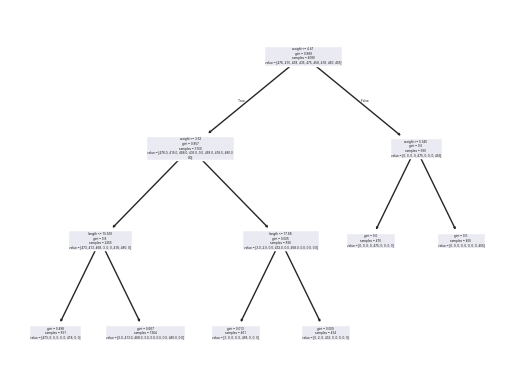

In [95]:
# Initialize the Decision Tree Classifier
features = ['length', 'weight']
X = df[features]
y = df['species']

dtree = DecisionTreeClassifier(max_depth=3)
dtree = dtree.fit(X, y)
tree.plot_tree(dtree, feature_names=features)

Decision Tree visualization
Length and weight by species

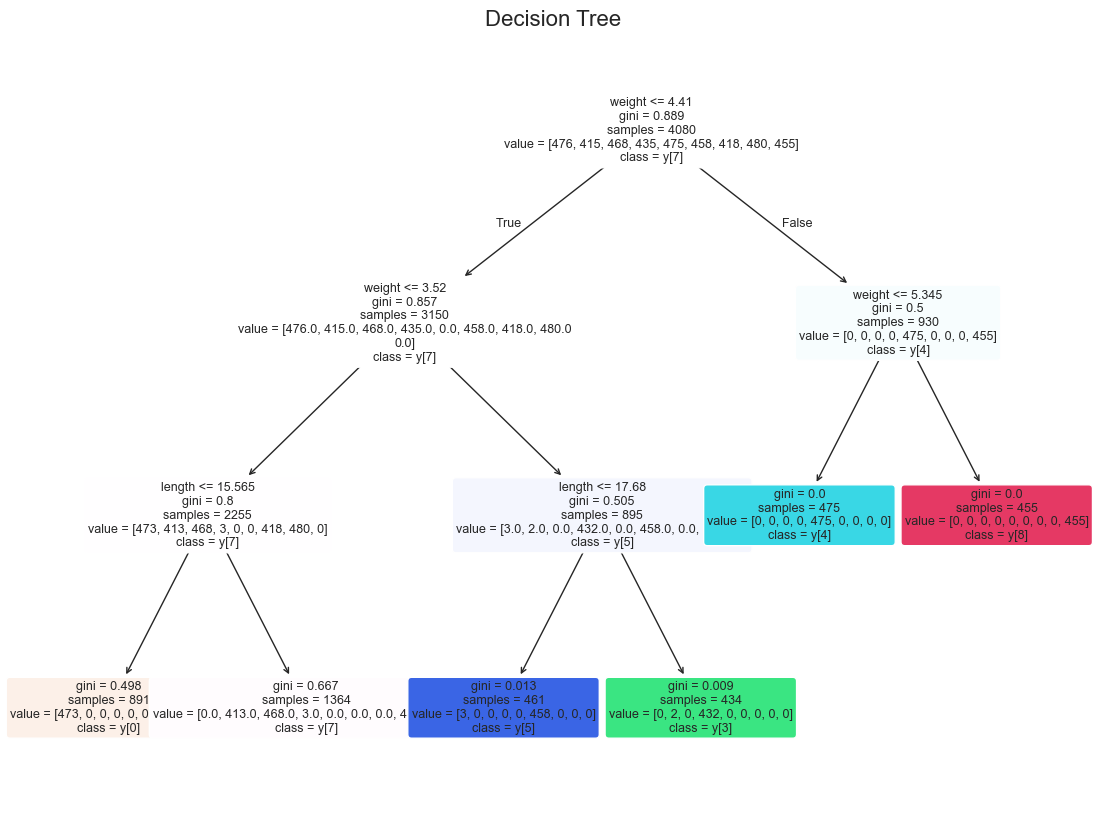

In [96]:
# Plot the decision tree
plt.figure(figsize=(14, 10))
plot_tree(dtree, feature_names=X.columns, class_names=True, filled=True, rounded=True, fontsize=9)
plt.title("Decision Tree", fontsize=16)
plt.show()
# gini = how mixed classes are
# sample = number of data points
# values = distribution of data points
# class lable based on the majority of samples

In [ ]:
# Knoten-ID für jede Instanz
node_indicator = dtree.apply(X)

# Blattknoten identifizieren
leaf_nodes = np.where(dtree.tree_.children_left == -1)[0]

# Gewichtsdaten für jedes Blatt berechnen
leaf_weights = {
    node: np.mean(df.loc[node_indicator == node, "weight"]) for node in leaf_nodes
}

# Baum visualisieren
plt.figure(figsize=(14, 10))
tree_plot = plot_tree(
    dtree,
    feature_names=features,
    class_names=y.unique(),
    filled=True,
    rounded=True,
    fontsize=10,
)

# Blattknoten-Positionen aus der Plot-Funktion extrahieren
ax = plt.gca()
for leaf_id in leaf_weights.keys():
    leaf_label = f"Weight: {leaf_weights[leaf_id]:.2f}"
    # Blattposition holen
    xy = (
        (dtree.tree_.threshold[leaf_id] + dtree.tree_.value[leaf_id][0][0]) / 2,
        dtree.tree_.value[leaf_id][0][1],
    )
    plt.text(
        *xy,
        leaf_label,
        ha="center",
        fontsize=10,
        color="red",
    )

plt.title("Decision Tree with Custom Leaf Labels", fontsize=16)
plt.show()

TypeError: got an unexpected keyword argument 'node_label'

<Figure size 1400x1000 with 0 Axes>